In [ ]:
!pip3 install -U scikit-learn scipy matplotlib
!pip install ultralytics

In [24]:
# Import your Libraries 
import torch
from torchvision import transforms
from PIL import Image, ImageDraw
from pathlib import Path
from ultralytics import YOLO
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle
import numpy as np
import seaborn as sns
from matplotlib.colors import to_rgba_array 

In [27]:
#Let's Start !!
# Define hook function
def hook_fn(module, input, output):
    intermediate_features.append(output)

# Define feature extraction function
def extract_features(model, img, layer_index=20): ##Choose the layer that fit your application
    global intermediate_features
    intermediate_features = []
    hook = model.model.model[layer_index].register_forward_hook(hook_fn)
    print(hook)
    with torch.no_grad():
        model(img)
    hook.remove()
    return intermediate_features[0]  # Access the first element of the list

# Make sure to preprocess the image since the input image must be 640x640x3
def preprocess_image(img_path):
    transform = transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.Grayscale(num_output_channels=3),  # Convert to RGB
        transforms.ToTensor(),
        transforms.Normalize(mean=0., std=1.)
    ])
    img = Image.open(img_path)
    img = transform(img)
    img = img.unsqueeze(0)
    
    return img

In [28]:
# Load YOLOv8 model
weights_path = Path("yolov8x.pt")
model = YOLO(weights_path)
img = Path(r'me.jpg') #Drage your image path here

img = preprocess_image(img)
features = extract_features(model, img, layer_index=20)


0: 640x640 1 person, 1 potted plant, 48.5ms
Speed: 1.0ms preprocess, 48.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)



0: 640x640 1 person, 1 potted plant, 362.5ms
Speed: 4.0ms preprocess, 362.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Features shape for me.jpg: torch.Size([1, 1280, 20, 20])


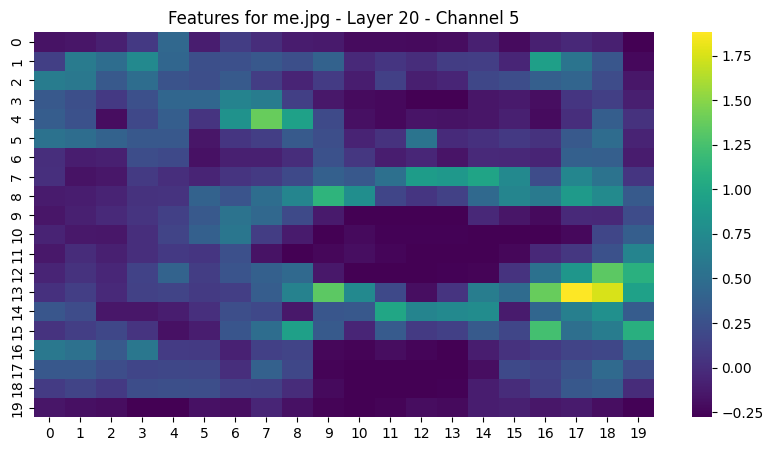

In [36]:
# Plot the Features extracted
def extract_and_plot_features(img_path, layer_index=20, channel_index=5):
    
    img = preprocess_image(img_path)
    features = extract_features(model, img, layer_index)

        # Print the shape of the features
    print(f"Features shape for {img_path.name}: {features.shape}")

        # Plot the features as a heatmap for a specific channel
    plt.figure(figsize=(10, 5))
    sns.heatmap(features[0][channel_index].cpu().numpy(), cmap='viridis', annot=False)
    plt.title(f'Features for {img_path.name} - Layer {layer_index} - Channel {channel_index}')
    plt.show()

image = Path(r"me.jpg") #Drage your image path here
extract_and_plot_features(image, layer_index=20)